In [4]:
import numpy as np
c = np.array([[1, 0, 0, 0, 0, 0, 0]]) #入力 one-hot表現（単語など）
W = np.random.randn(7,3)#重み
h = np.dot(c,W)
print(h)

[[-0.0028196  -1.55801041  1.06488105]]


In [7]:
import sys
sys.path.append('..')
from common.layers import MatMul #行列の積の計算を行うレイヤ

c = np.array([[1, 0, 0, 0, 0, 0, 0]]) #入力 one-hot表現（単語など）
W = np.random.randn(7,3)#重み
layer = MatMul(W) #重みを入力としてレイヤが形成される
h = layer.forward(c)
print(h) #動作としては↑と同じ


[[-0.70032753  0.80688526  0.98398999]]


In [8]:
#Word2vecの実装　Word2vecは隣接する前後２つの単語からその間に入る単語を推定するNN
#入力　前後２つの単語（２つのone-hotvec）
#出力　推定する単語（１つのone-hot-vec）softmaxで多クラス分類
#この際，入力と隠れ層をつなぐ重みWinが入力単語の分散表現になる（入力をWinで圧縮するので，圧縮後の各業は各単語の本質的な情報が残る）

import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss
#2層のネットワーク
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size #V;入力ベクトルのサイズ　

        #重みの初期化
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        #レイヤの作成
        self.in_layer0 = Matmul(W_in)
        self.in_layer1 = Matmul(W_in) #２つのベクトルから入力を受ける．重みは共通
        self.out_layer = Matmul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        #レイヤをまとめる
        layers = [self.in_layer0, self.in_layer1, self.out_layer, self.loss_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params #各レイヤーの重みをまとめて追加
            self.grads += layer.grads #各レイヤーのパラメータの勾配も
        self.ward_vec = W_in #単語の分散表現はW_inとする（W_outとする場合もある）
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0]) #contextsは3次元．0を指定すると前の単語を示し，h0にはonehotvecが入る
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1)*0.5 #２つの入力の平均
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score)
        return loss

    def backward(self, dout = 1): #doutは誤差
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5 #入力が２つあるので，半分ずつ誤差を伝播させる
        self.in_layer0.backward(da) #この命令で角層の重みは更新される
        self.in_layer1.backward(da)
        #self.in_layer0 = Matmul(W_in)　__init__にこれがあるので各層で重みが更新されればネットワークにも反映される
        return None

In [9]:
# coding: utf-8
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

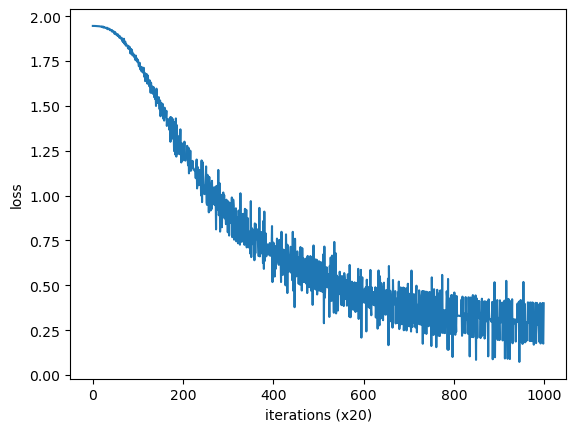

you [-0.7988384 -1.3612608  0.9019456 -0.9029929  1.5469491]
say [ 1.2827922  -0.19648123 -1.2641194   1.2417966   0.27141422]
goodbye [-1.2336941   0.10166872  1.1876963  -1.2168239  -0.5457838 ]
and [ 0.99430186 -1.4759033  -0.97922003  0.9523673   1.4493573 ]
i [-1.219502    0.08400193  1.1418651  -1.1734818  -0.55780935]
hello [-0.8135566 -1.3680351  0.9297996 -0.921612   1.541936 ]
. [ 1.1865106  1.356169  -1.1494311  1.146049  -1.4416853]


In [10]:
#実際に学習してみる
window_size = 1 #隣接するいくつの単語をcontextとするか
hidden_size = 5 #中間層のニューロン数
batch_size = 3 # 入力は何個の単語か
max_epoch = 1000 #1000回まで学習する

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text) #入力データ，教師データの作成

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size) #入力データ，教師データをidで作成
target = convert_one_hot(target, vocab_size) #入力データ，教師データをone hot vecで表現
contexts = convert_one_hot(contexts, vocab_size)

#学習
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam() #各層のパラメータの更新方法　勾配法の発展
trainer = Trainer(model, optimizer) #モデルの訓練　ミニバッチ訓練をやってくれる
#訓練開始
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs #各単語の分散表現
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])